In [27]:
import numpy as np
import scipy.signal as signal
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

## Parametros do sistema

In [28]:
g = 9.81
a1 = 0.02
a2 = 0.05
A1 = 0.5
A2 = 2.0

## Caracteristicas do sistema

In [29]:
u_bar = 0.5
h1_bar = u_bar**2 / (2 * g * a1**2)
h2_bar = u_bar**2 / (2 * g * a2**2)
x_bar = np.array([h1_bar, h2_bar])

## Matriz do sistema linearizado

In [30]:
A_matrix = np.array([[-0.015696, 0], [0.003924, -0.024525]])
B_matrix = np.array([[2], [0]])
C_matrix = np.array([[0, 1]])
D_matrix = np.array([[0]])

## Sistema linear criado apartir do espaço de estado

In [31]:
linear_system = signal.StateSpace(A_matrix, B_matrix, C_matrix, D_matrix)

## Sistema não linear

In [32]:
def nonlinear_system_ode(t, x):
    h1, h2 = x
    dh1_dt = (1/A1) * (u_bar - a1 * np.sqrt(2 * g * h1))
    dh2_dt = (1/A2) * (a1 * np.sqrt(2 * g * h1) - a2 * np.sqrt(2 * g * h2))
    return [dh1_dt, dh2_dt]

In [33]:
x0_nonlinear = [0, 0]
t_span = [0, 1000]
t_eval = np.linspace(t_span[0], t_span[1], 1000)

## Solução do sistema não linear

In [34]:
sol_nonlinear = solve_ivp(
    fun=nonlinear_system_ode,
    t_span=t_span,
    y0=x0_nonlinear,
    t_eval=t_eval
)

/tmp/ipykernel_23033/1110291687.py:4: RuntimeWarning: invalid value encountered in sqrt
  dh2_dt = (1/A2) * (a1 * np.sqrt(2 * g * h1) - a2 * np.sqrt(2 * g * h2))


In [35]:
h2_nonlinear = sol_nonlinear.y[1]

In [36]:
delta_x0 = x0_nonlinear - x_bar

In [ ]:
t_linear, delta_y, delta_x_out = signal.lsim(
    linear_system,
    U=np.zeros_like(t_eval),
    T=t_eval,
    X0=delta_x0
)


In [38]:
h2_linear = h2_bar + delta_y

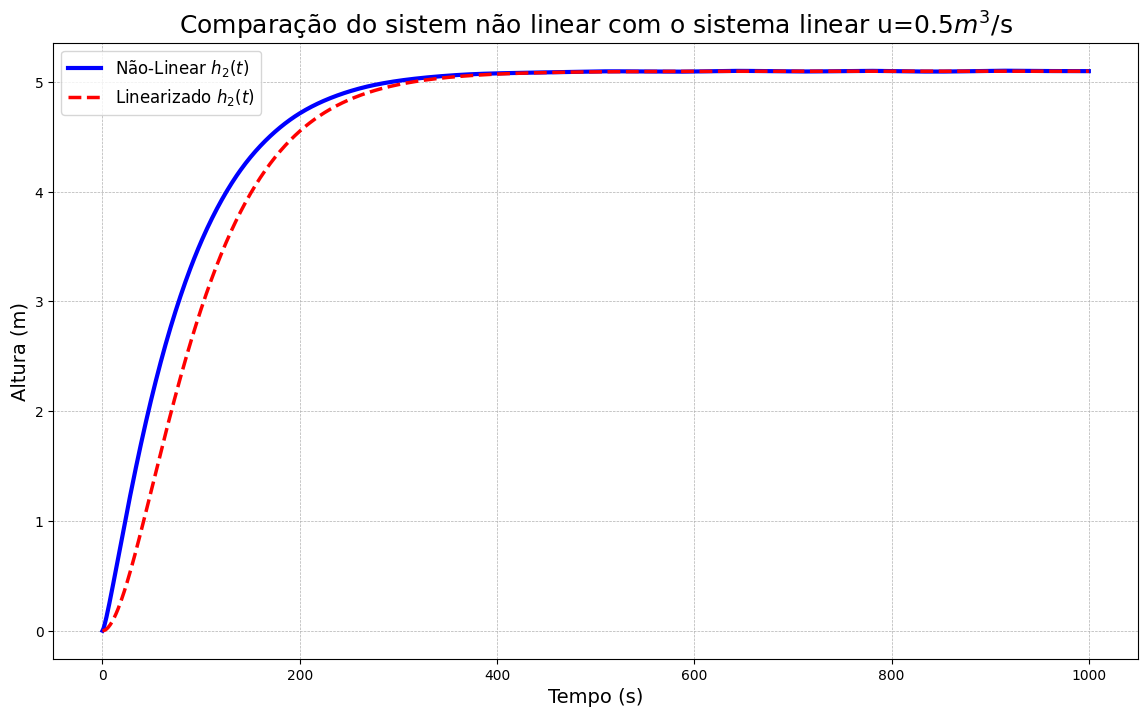

In [39]:
plt.figure(figsize=(14, 8))
plt.plot(t_eval, h2_nonlinear, label='Não-Linear $h_2(t)$', color='blue', linewidth=3)
plt.plot(t_linear, h2_linear, label='Linearizado $h_2(t)$', color='red', linestyle='--', linewidth=2.5)
plt.title('Comparação do sistem não linear com o sistema linear u=0.5$m^3/$s', fontsize=18)
plt.xlabel('Tempo (s)', fontsize=14)
plt.ylabel('Altura (m)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

A diferença entre as respostas dos sistemas **linearizado** e **não linear** pode ser atribuída à própria natureza da **linearização**. Quando realizamos a linearização de um sistema dinâmico não linear, utilizamos uma **expansão em série de Taylor de primeira ordem** em torno de um **ponto de equilíbrio** específico. Neste caso, determinado por uma entrada constante $u = 0.5\, \text{m}^3/\text{s}$. Isso significa que o modelo linearizado é uma **aproximação local**, válida apenas para pequenas perturbações em torno desse ponto de operação.

No nosso caso, as equações dinâmicas originais dos tanques envolvem termos não lineares como $\sqrt{h_1}$ e $\sqrt{h_2}$, relacionados à **vazão**, que depende da raiz quadrada da altura. A linearização substitui esses termos por **aproximações lineares**, o que introduz erro quanto maior for a distância do sistema ao ponto de equilíbrio.
